In [1]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import os, sys # For filepaths
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import label_binarize
import pickle
import sklearn.preprocessing as pre
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
''' Add the datasets and libraries to the system path '''

# Find the path to our implementations
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
home_directory = os.path.dirname(parent_directory)
libraries_path = os.path.join(home_directory, 'Libraries')

# Find the path to the datasets
datasets_path = os.path.join(home_directory, 'Datasets')

# Add them both to the system path
sys.path.append(datasets_path)
sys.path.append(libraries_path)

In [3]:
''' Load the dataset '''

dataset = np.load(os.path.join(datasets_path, 'fashion_train.npy'))
print("Dataset shape: ", dataset.shape)

Dataset shape:  (10000, 785)


In [4]:
test_dataset = np.load(os.path.join(datasets_path, 'fashion_test.npy'))

In [5]:
X_train = dataset[:, :-1]  # Define the images as all columns except the last one
y_train = dataset[:, -1] # Define the labels as the last column

In [6]:
X_test = test_dataset[:, :-1]  # Define the images as all columns except the last one
y_test = test_dataset[:, -1] # Define the labels as the last column

In [7]:
# scaling the images
scaler = pre.StandardScaler()
X_train = scaler.fit_transform(X_train)

In [8]:
# scaling the images
scaler = pre.StandardScaler()
X_test = scaler.fit_transform(X_test)

In [9]:
# import classifiers 
from sklearn import svm 
from CNN import CNN
from Bayes import Bayes_classifier
from sklearn.neighbors import KNeighborsClassifier as KNN

# Get final models

## SVM classifier

In [10]:
svm_model = svm.SVC(C=10)
svm_model.fit(X_train,y_train)
pickle.dump(svm_model,open('svm_model.pkl', 'wb'))

In [11]:
# svm_model = svm.SVC()
svm_model = pickle.load(open('svm_model.pkl', 'rb'))

In [12]:
predictions = svm_model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='macro')
precision= precision_score(y_test, predictions, zero_division=0, average='macro')
recall= recall_score(y_test, predictions, average='macro')

In [14]:
print(accuracy, f1, precision, recall)

0.8508 0.8513349500825498 0.8519939883761722 0.8507999999999999


In [15]:
print(classification_report(y_test, predictions, digits = 4))

              precision    recall  f1-score   support

           0     0.7965    0.8140    0.8051      1000
           1     0.9877    0.9630    0.9752      1000
           2     0.8545    0.8630    0.8587      1000
           3     0.9089    0.8980    0.9034      1000
           4     0.7124    0.7160    0.7142      1000

    accuracy                         0.8508      5000
   macro avg     0.8520    0.8508    0.8513      5000
weighted avg     0.8520    0.8508    0.8513      5000



In [16]:
target_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt']

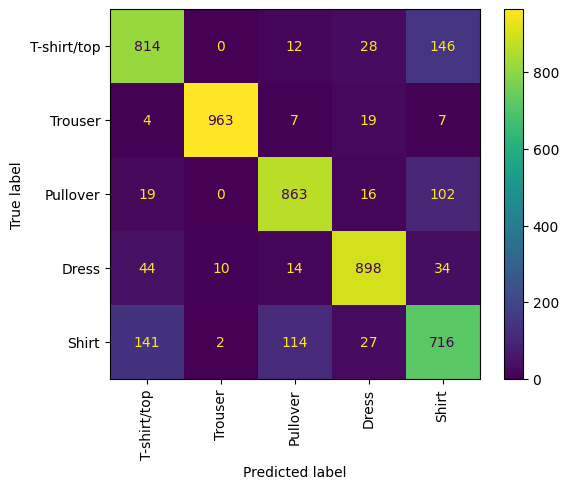

In [17]:
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, display_labels=target_names,xticks_rotation='vertical' )

## Naive Bayes classifier

In [18]:
bandwidth = 1.06 * np.std(X_train) * np.power(X_train.shape[0], -1/5)
Bayes = Bayes_classifier(bandwidth)

In [19]:
Bayes.fit(X_train, y_train)

In [20]:
predictions = Bayes.predict(X_test)

(5000, 2)


c:\Users\annam\Desktop\ITU\3rd_sem\01_Machine_Learning\Project\ML_Project\Libraries\Bayes.py:62: RuntimeWarning: invalid value encountered in scalar divide
  class_prob = num / denom


In [21]:
print(classification_report(y_test, predictions, digits = 4))

              precision    recall  f1-score   support

           0     0.5792    0.7680    0.6604      1000
           1     0.9753    0.9470    0.9609      1000
           2     0.7564    0.6550    0.7020      1000
           3     0.8071    0.7780    0.7923      1000
           4     0.4948    0.4320    0.4613      1000

    accuracy                         0.7160      5000
   macro avg     0.7225    0.7160    0.7154      5000
weighted avg     0.7225    0.7160    0.7154      5000



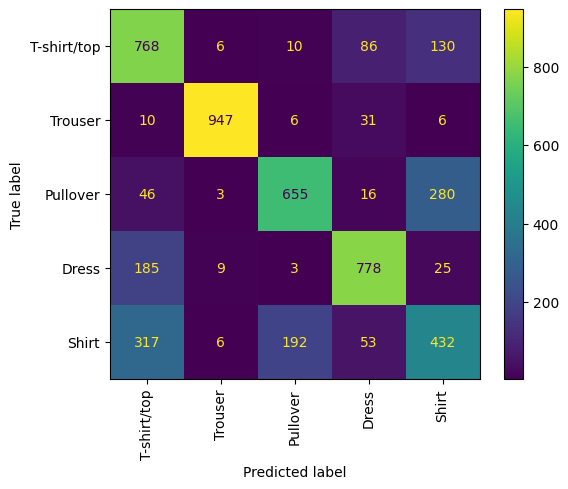

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions, display_labels=target_names,xticks_rotation='vertical' )